In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
train_data = pd.read_csv('C:/Users/sarva/Downloads/train.csv/train.csv')
test_data = pd.read_csv('C:/Users/sarva/Downloads/test.csv')

In [35]:
print("Basic Information:")
print(train_data.info())
print("\nMissing Values:\n", train_data.isnull().sum())
print("\nSummary Statistics:\n", train_data.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB
None

Missing Values:
 ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64

Summary Statistics:
            ad_spend         units     unit_price
count  77303.000000  83592.000000  101490.000000
mean     110.771470     10.284381     106.750922
std      529.303777     68.945915 

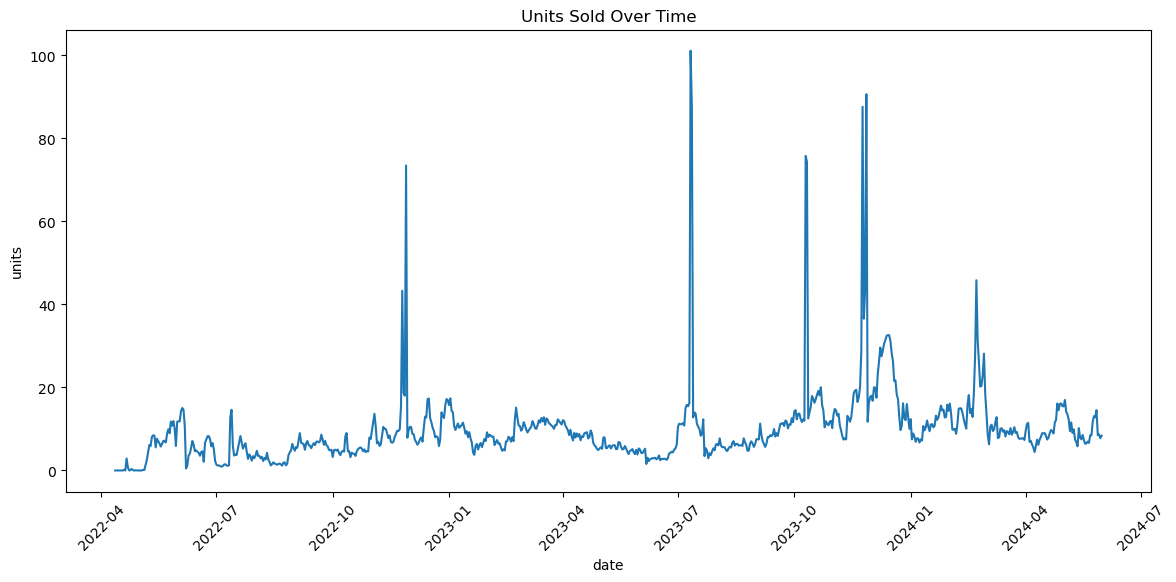

In [36]:
# 2. Date Analysis
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['day_of_week'] = train_data['date'].dt.dayofweek
plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='units', data=train_data, ci=None)
plt.title('Units Sold Over Time')
plt.xticks(rotation=45)
plt.show()

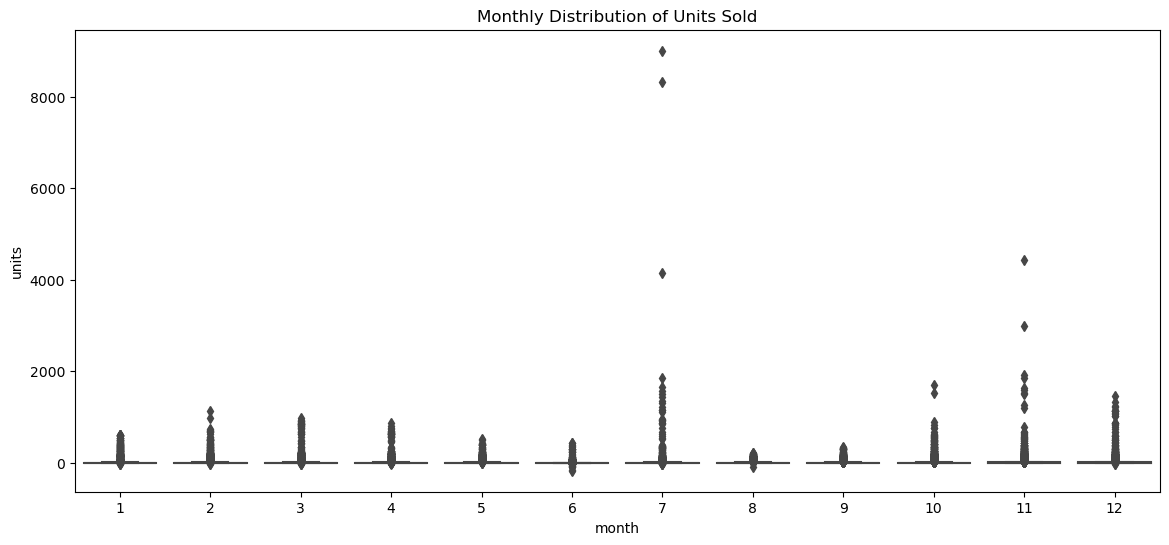

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot(x='month', y='units', data=train_data)
plt.title('Monthly Distribution of Units Sold')
plt.show()

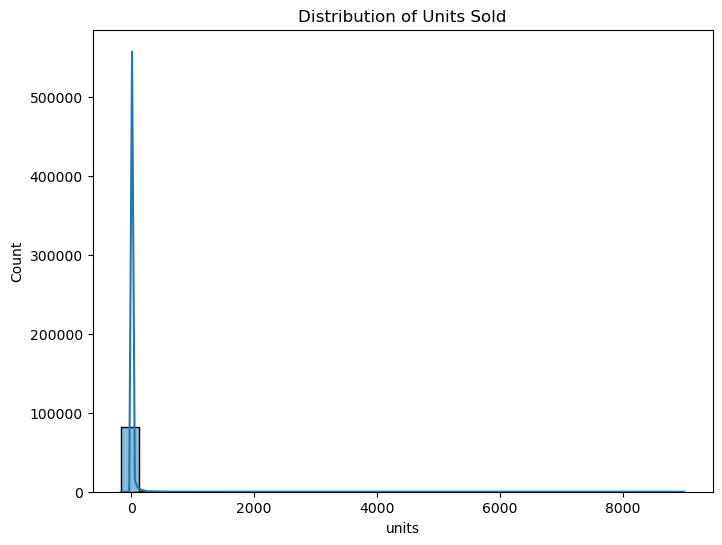

In [38]:
# 3. Target Variable (`units`) Analysis
plt.figure(figsize=(8,6))
sns.histplot(train_data['units'], bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.show()

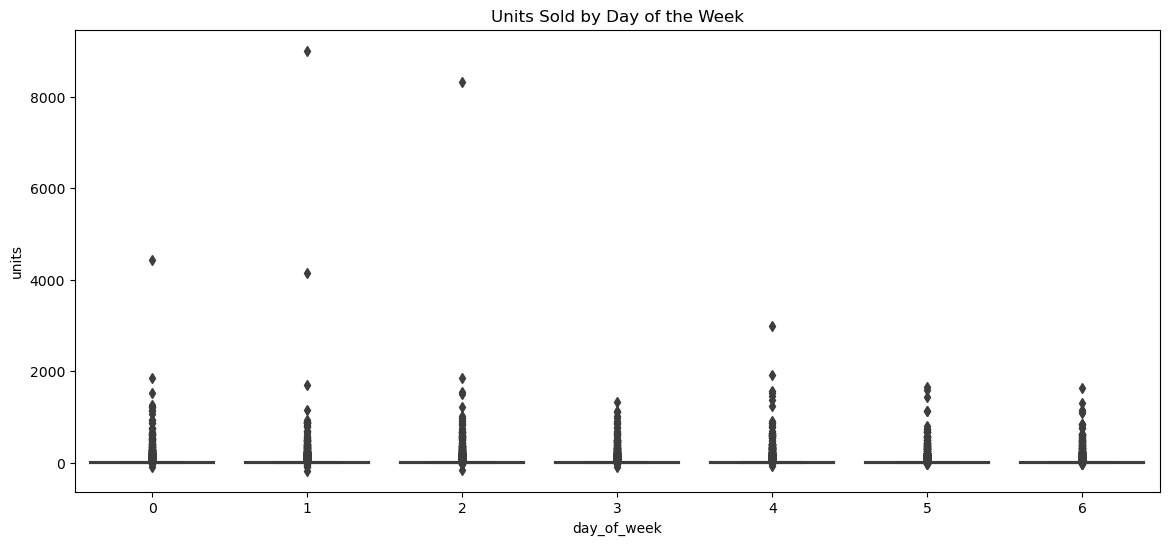

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(x='day_of_week', y='units', data=train_data)
plt.title('Units Sold by Day of the Week')
plt.show()

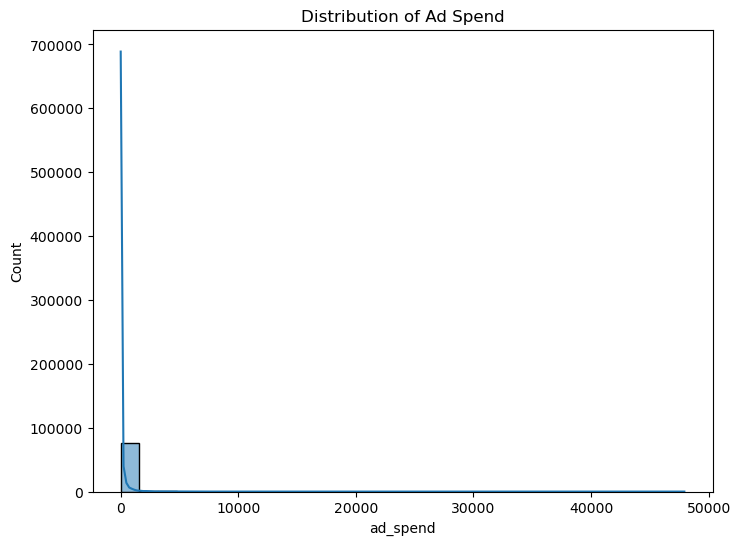

In [40]:
# 4. Ad Spend Analysis
plt.figure(figsize=(8,6))
sns.histplot(train_data['ad_spend'], bins=30, kde=True)
plt.title('Distribution of Ad Spend')
plt.show()

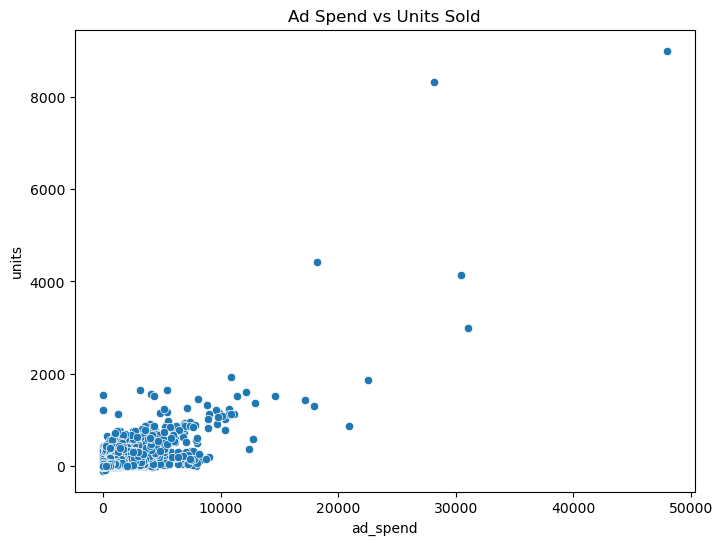

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ad_spend', y='units', data=train_data)
plt.title('Ad Spend vs Units Sold')
plt.show()


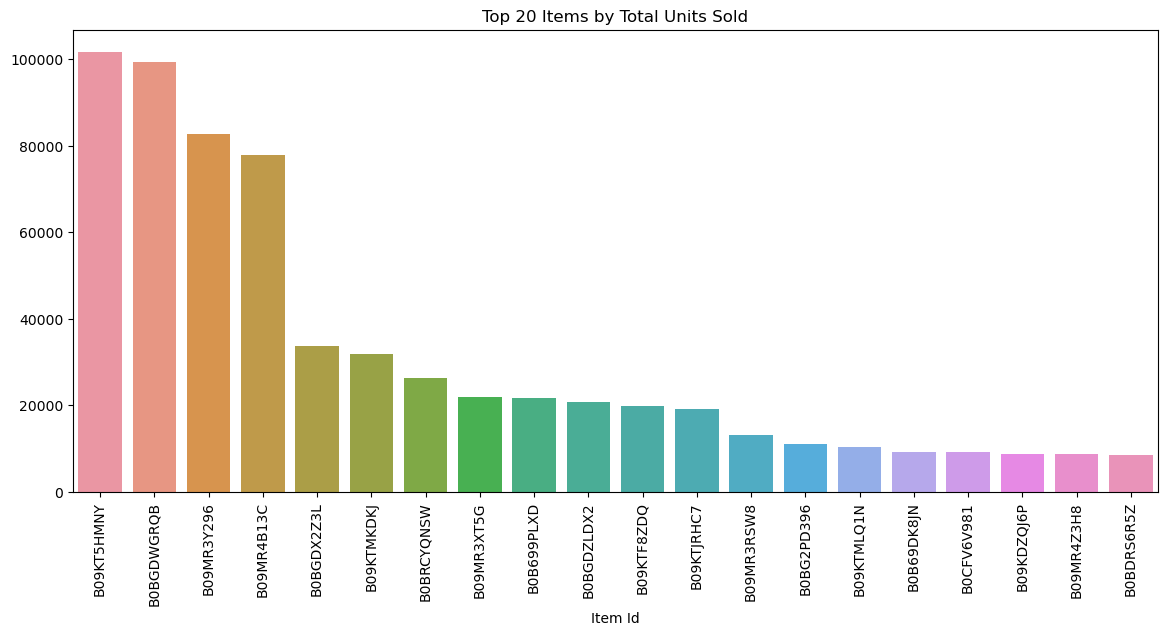

In [42]:
# 5. Item-Specific Analysis
plt.figure(figsize=(14,6))
item_sales = train_data.groupby('Item Id')['units'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.title('Top 20 Items by Total Units Sold')
plt.xticks(rotation=90)
plt.show()

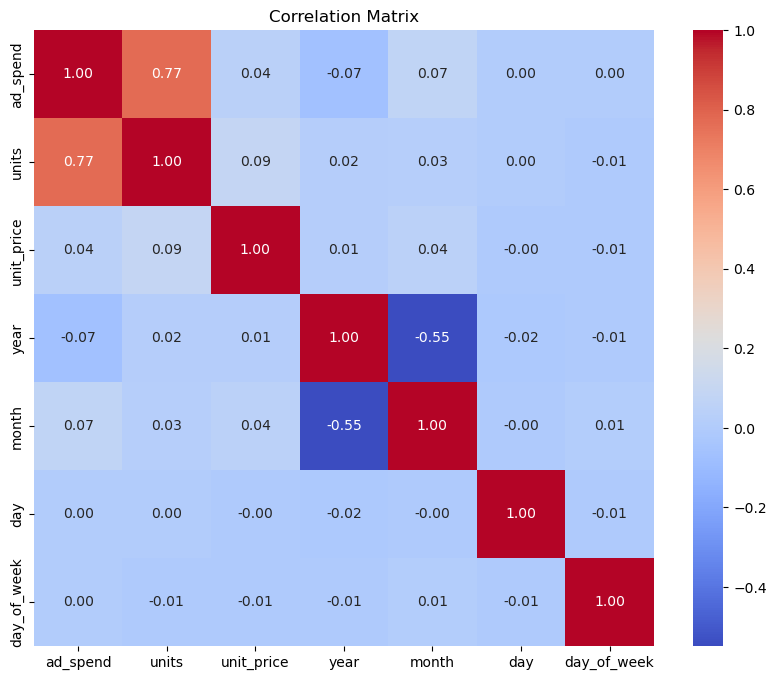

In [43]:
# 6. Correlation Analysis
plt.figure(figsize=(10,8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
#Feature Engineering

train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])


In [45]:
# Create new date-based features
for dataset in [train_data, test_data]:
    dataset['year'] = dataset['date'].dt.year
    dataset['month'] = dataset['date'].dt.month
    dataset['day'] = dataset['date'].dt.day
    dataset['day_of_week'] = dataset['date'].dt.dayofweek
    dataset['week_of_year'] = dataset['date'].dt.isocalendar().week
    dataset['is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [46]:
# Lag Features: Creating lag features can help capture trends from previous days
for lag in range(1, 8):  # Creating lag features for the past week
    train_data[f'lag_{lag}'] = train_data.groupby('Item Id')['units'].shift(lag)

In [47]:
# Rolling Features: Calculate rolling statistics to capture trends
train_data['rolling_mean_7'] = train_data.groupby('Item Id')['units'].transform(lambda x: x.rolling(window=7).mean())
train_data['rolling_std_7'] = train_data.groupby('Item Id')['units'].transform(lambda x: x.rolling(window=7).std())

# Drop rows with NaN values generated by lag and rolling features
train_data.dropna(inplace=True)

In [66]:
# Check the actual column names
print(train_data.columns)

Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price', 'year', 'month', 'day', 'day_of_week', 'week_of_year',
       'is_weekend', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'rolling_mean_7', 'rolling_std_7'],
      dtype='object')


In [68]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('C:/Users/sarva/Downloads/train.csv/train.csv')
test_data = pd.read_csv('C:/Users/sarva/Downloads/test.csv')
submission_data = pd.read_csv('C:/Users/sarva/Downloads/sample_submission.csv')

# Display the first few rows of each dataset
train_data.head(), test_data.head(), submission_data.head()

(                      ID        date     Item Id  \
 0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
 1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
 2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
 3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
 4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   
 
                                            Item Name  ad_spend anarix_id  \
 0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
 1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
 2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
 3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
 4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
 
    units  unit_price  
 0    0.0         0.0  
 1    0.0         0.0  
 2    0.0         0.0  
 3    0.0         0.0  
 4    0.0         0.0  ,
                       ID        date     Item Id  \
 0  2024-07-01_B09

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


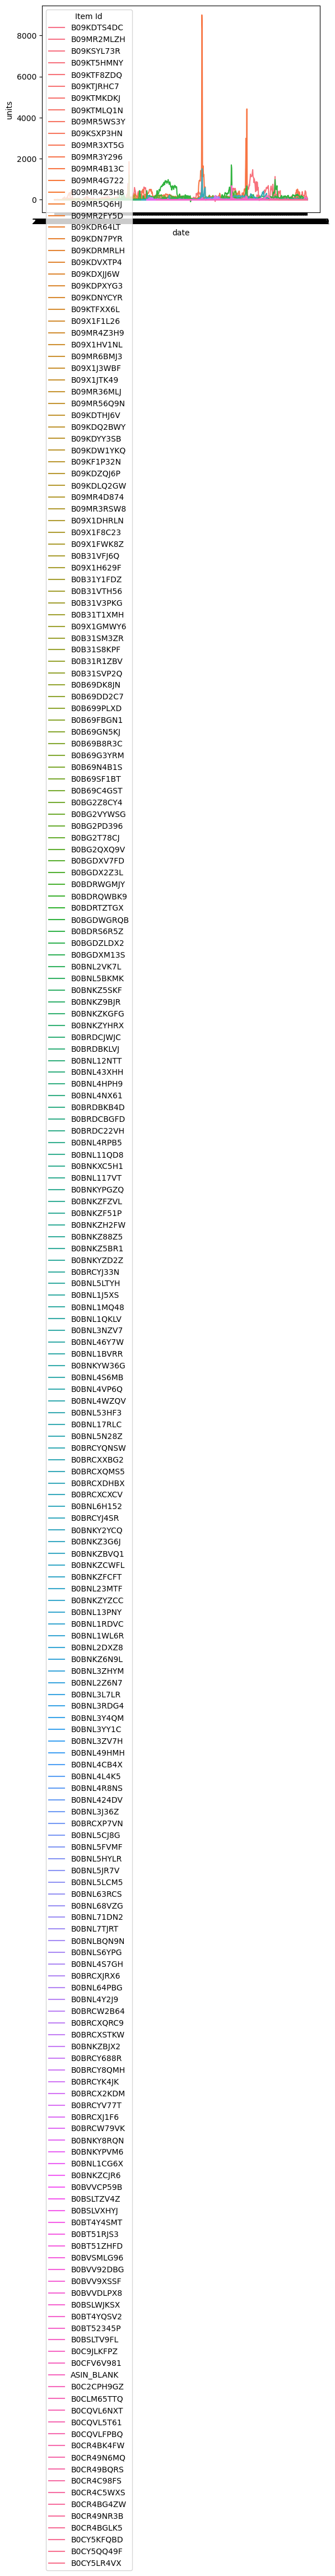

In [70]:
# EDA
train_data.info()
train_data.describe()
sns.lineplot(data=train_data, x='date', y='units', hue='Item Id')
plt.show()

In [71]:
# Feature Engineering
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [72]:
# Creating date-related features
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['month'] = train_data['date'].dt.month
train_data['quarter'] = train_data['date'].dt.quarter

In [73]:
test_data['day_of_week'] = test_data['date'].dt.dayofweek
test_data['month'] = test_data['date'].dt.month
test_data['quarter'] = test_data['date'].dt.quarter

In [74]:
# Lag features
for lag in range(1, 8):
    train_data[f'lag_{lag}'] = train_data.groupby('Item Id')['units'].shift(lag)

In [76]:
# Lag features
for lag in range(1, 8):
    train_data[f'lag_{lag}'] = train_data.groupby('Item Id')['units'].shift(lag)

# Rolling statistics
train_data['rolling_mean_7'] = train_data.groupby('Item Id')['units'].transform(lambda x: x.rolling(window=7).mean())
train_data['rolling_std_7'] = train_data.groupby('Item Id')['units'].transform(lambda x: x.rolling(window=7).std())

In [77]:
# Drop rows with NaN values created by lag and rolling window
train_data.dropna(inplace=True)

# Encode categorical variables
train_data['Item Id'] = train_data['Item Id'].astype('category').cat.codes
test_data['Item Id'] = test_data['Item Id'].astype('category').cat.codes

In [ ]:
# Select features and target
X = train_data.drop(columns=['units'])
y = train_data['units']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

# Prepare the test data
X_test = test_data
predictions = model.predict(X_test)

# Prepare the submission file
submission = sample_submission.copy()
submission['units'] = predictions
submission.to_csv('C:/Users/sarva/Downloads/sample_submission.csv', index=False)